## Purpose.

Here we collect abstracts and titles from [*strategy+business*](https://www.strategy-business.com/) magazine, formerly published by the consultancy Booze-Allen-Hamilton.  This information is to be used as part of an attempt to apply text classification to charting the progression of business strategy.

## Approach.

Titles and abstracts are available without paywall login. But we have to do this in ***three stages***.  

⓵ **Get the URL for the each volume**. We start with the journal's hope page.  Our essential information is embedded in a frame depicted below on the right-hand side of the page. 

⓶ **Get a list of issue URLs**.  Each volume page contains thumbnail images of individual issues. These include URLs to the individual isses. 

⓷ **Collect lists of titles**.  Follow each issue's URL to its issue table of contents. The tables of contents contain titles, as well as URLs to pages for individual articles.

⓸ **Collect abstracts**.  Abstracts are accessible from individual articles. We have to get the abstracts from these individual-article pages.


### Running on Azure.

If we need to run in Azure, we will need to install ChromeDriver on the Ubuntu host.  This https://www.srcmake.com/home/selenium-python-chromedriver-ubuntu describes the procedure.




In [1]:
# Import libaries
import requests as req
import pandas as pd
import numpy as np
import time
import itertools as it
import json
import datetime
import matplotlib.pyplot as plt
import seaborn as sns 
import itertools as it
import os

In [2]:
os.path.abspath(os.getcwd())

'/Users/nhamlett/Documents/GitHub/UncertaintResearch/Biz-StratTopicAnalysis/Code'

In [3]:
known_topic_cond_doc = pd.read_csv(filepath_or_buffer = '../data/knownDocstopicCondDoc.csv')\
                              .pivot(index = "volIssueTitleHash",
                                     columns = "topic",
                                     values = "topicCondDoc")
known_topic_profle = pd.read_csv(filepath_or_buffer = '../data/knownDocsProfile.csv',
                                 usecols = ["volIssueTitleHash", "theme"])\
                        .set_index(keys = 'volIssueTitleHash')


In [4]:
known_topic_cond_doc.min().min()

0.054224061611793765

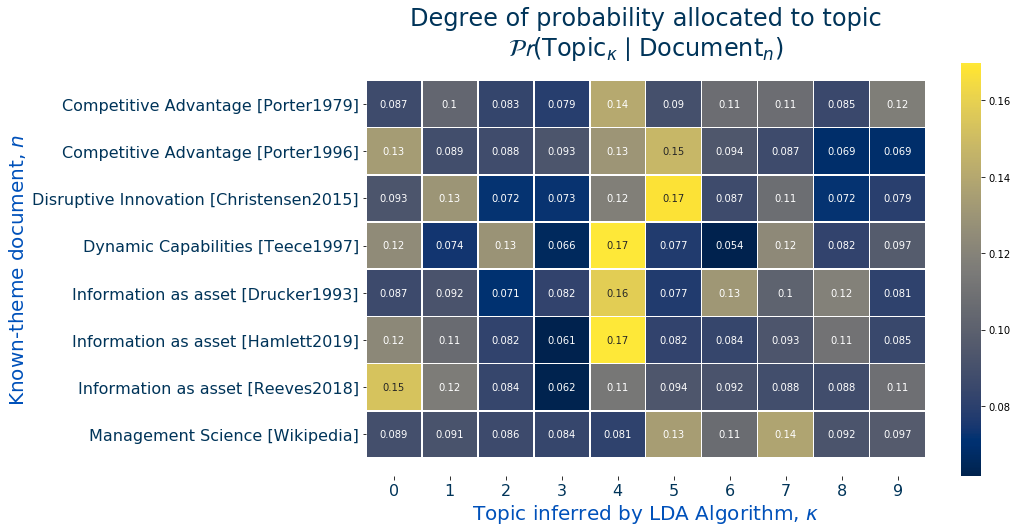

In [17]:
plt.figure(figsize = (15,7.5))
sns.heatmap(pd.merge(left = known_topic_profle,
                     right = known_topic_cond_doc,
                     left_index = True,
                     right_index = True)
               .set_index(keys = "theme")
               .sort_index(ascending = False),
            cmap = 'cividis',
            linewidths = 0.5,
            robust = True,
            annot = True)
plt.ylim(bottom = -0.375,
         top = 8.375)
plt.title(label = "Degree of probability allocated to topic\n$\mathcal{Pr}(\mathrm{Topic}_\kappa\mid\mathrm{Document}_n)$",
           fontsize = 24,
           color = '#003459')
plt.xlabel(xlabel = "Topic inferred by LDA Algorithm, $\kappa$",
           fontsize = 20,
           color = '#0051ba')
plt.ylabel(ylabel = "Known-theme document, $n$",
           fontsize = 20,
           color = '#0051ba');
plt.xticks(fontsize = 16,
           color = '#003459');
plt.yticks(fontsize = 16,
           color = '#003459');
plt.tight_layout()
plt.savefig(fname = '../graphics/known_docuement_topics.png',
            transparent = True,
            dpi = 180 )

In [6]:
known_topic_cond_doc.applymap(lambda ξ : -ξ * np.log(ξ)/np.log(known_topic_cond_doc.shape[1]))\
                    .sum(axis = 1)

volIssueTitleHash
214b08c422802c87a54d8db5938bca04    0.985758
7197813e912f6eceec5ddaab68bd8d1e    0.992347
8697e4b4d35ba9ae58fb32c7fc1810e5    0.974503
9b0d690936fcdbc30d3ddcdfd5c7c03a    0.982334
aa4425c27b38391cafccdf15cbdbff48    0.985682
bac8615fad4db20502445b67167fea77    0.993181
d1f5c2b70a40d9a1591fc0af5fad27ad    0.988581
fdedbecc37b400ccdec7bde0ebd5d104    0.982155
dtype: float64